<img src="assets/8_Main_Types_of_Heart_Disease.jpg" style="display:block; margin:auto" width=350>

<h1><center>Project Classifying Heart Disease</center></h1>

#### Scenario
In this project we'll  be looking at a real-life dataset: the Heart Disease Data Set from the UCI Machine Learning Repository. This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

We'll practice going through the machine learning pipeline, starting from examining the dataset itself to creating a polished classification model. Classification problems are much more common than regression problems, so it'll be good to get some practice.

#### Data
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date. The 14 columns look as follows:

| Variable | Type | Description |
| --- | --- | --- |
| present | Target (Discrete) | diagnosis of heart disease (angiographic disease status): (Value 0) < 50% diameter narrowing, (Value 1) > 50% diameter narrowing |
| | | |
| age | Continuous | age in years |
| cp | Discrete | chest pain type: (Value 1) typical angina, (Value 2) atypical angina, (Value 3) non-anginal pain, (Value 4) asymptomatic |
| sex | Discrete | 1 = male; 0 = female |
| trestbps | Continuous | resting blood pressure (in mm Hg on admission to the hospital) |
| chol | Continuous | chol: serum cholestoral in mg/dl |
| fbs | Discrete | fasting blood sugar > 120 mg/dl,  1 = true; 0 = false |
| restecg | Discrete | resting electrocardiographic results: (Value 0) normal, (Value 1) having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), (Value 2) showing probable or definite left ventricular hypertrophy by Estes' criteria |
| thalach | Continuous | maximum heart rate achieved |
| exang | Discrete | exercise induced angina (1 = yes; 0 = no) |
| oldpeak | Continuous | ST depression induced by exercise relative to rest |
| slope | Discrete | the slope of the peak exercise ST segment: (Value 1) upsloping, (Value 2) flat, (Value 3) downsloping |
| ca | Discrete | number of major vessels (0-3) colored by flourosopy |
| thal | Discrete | thal: 3 = normal; 6 = fixed defect; 7 = reversable defect |


In [1]:
# Import base packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset
heart = pd.read_csv('heart_disease.csv')

In [3]:
# Print initial dataset
heart

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
# Drop Unnamed column
heart.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Replace missing values
heart['ca'] = heart['ca'].replace('?', np.nan)
heart['thal'] = heart['thal'].replace(0.0, np.nan).replace('?', np.nan)

# Convert column to float
heart['ca'] = heart['ca'].astype(float)
heart['thal'] = heart['thal'].astype(float)

In [6]:
# Check dataframe info
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  present   303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [7]:
# Check data for na values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
present     0
dtype: int64

In [8]:
# Since there are just few nan or missing values we can drop them
heart.dropna(inplace=True)

In [9]:
# check again for na
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

In [10]:
# Show 15 first rows of dataframe
heart.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [11]:
# Look for data infos
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


#### Exploring the Dataset

Before we build any model, we should explore the dataset and perform any adjustments we might need before actually fitting the model. This may include converting categorical variables into dummy variables or centering and scaling variables. We'll also want to check for predictors that are distributed differently based on the outcome, since they could be informative for classification.

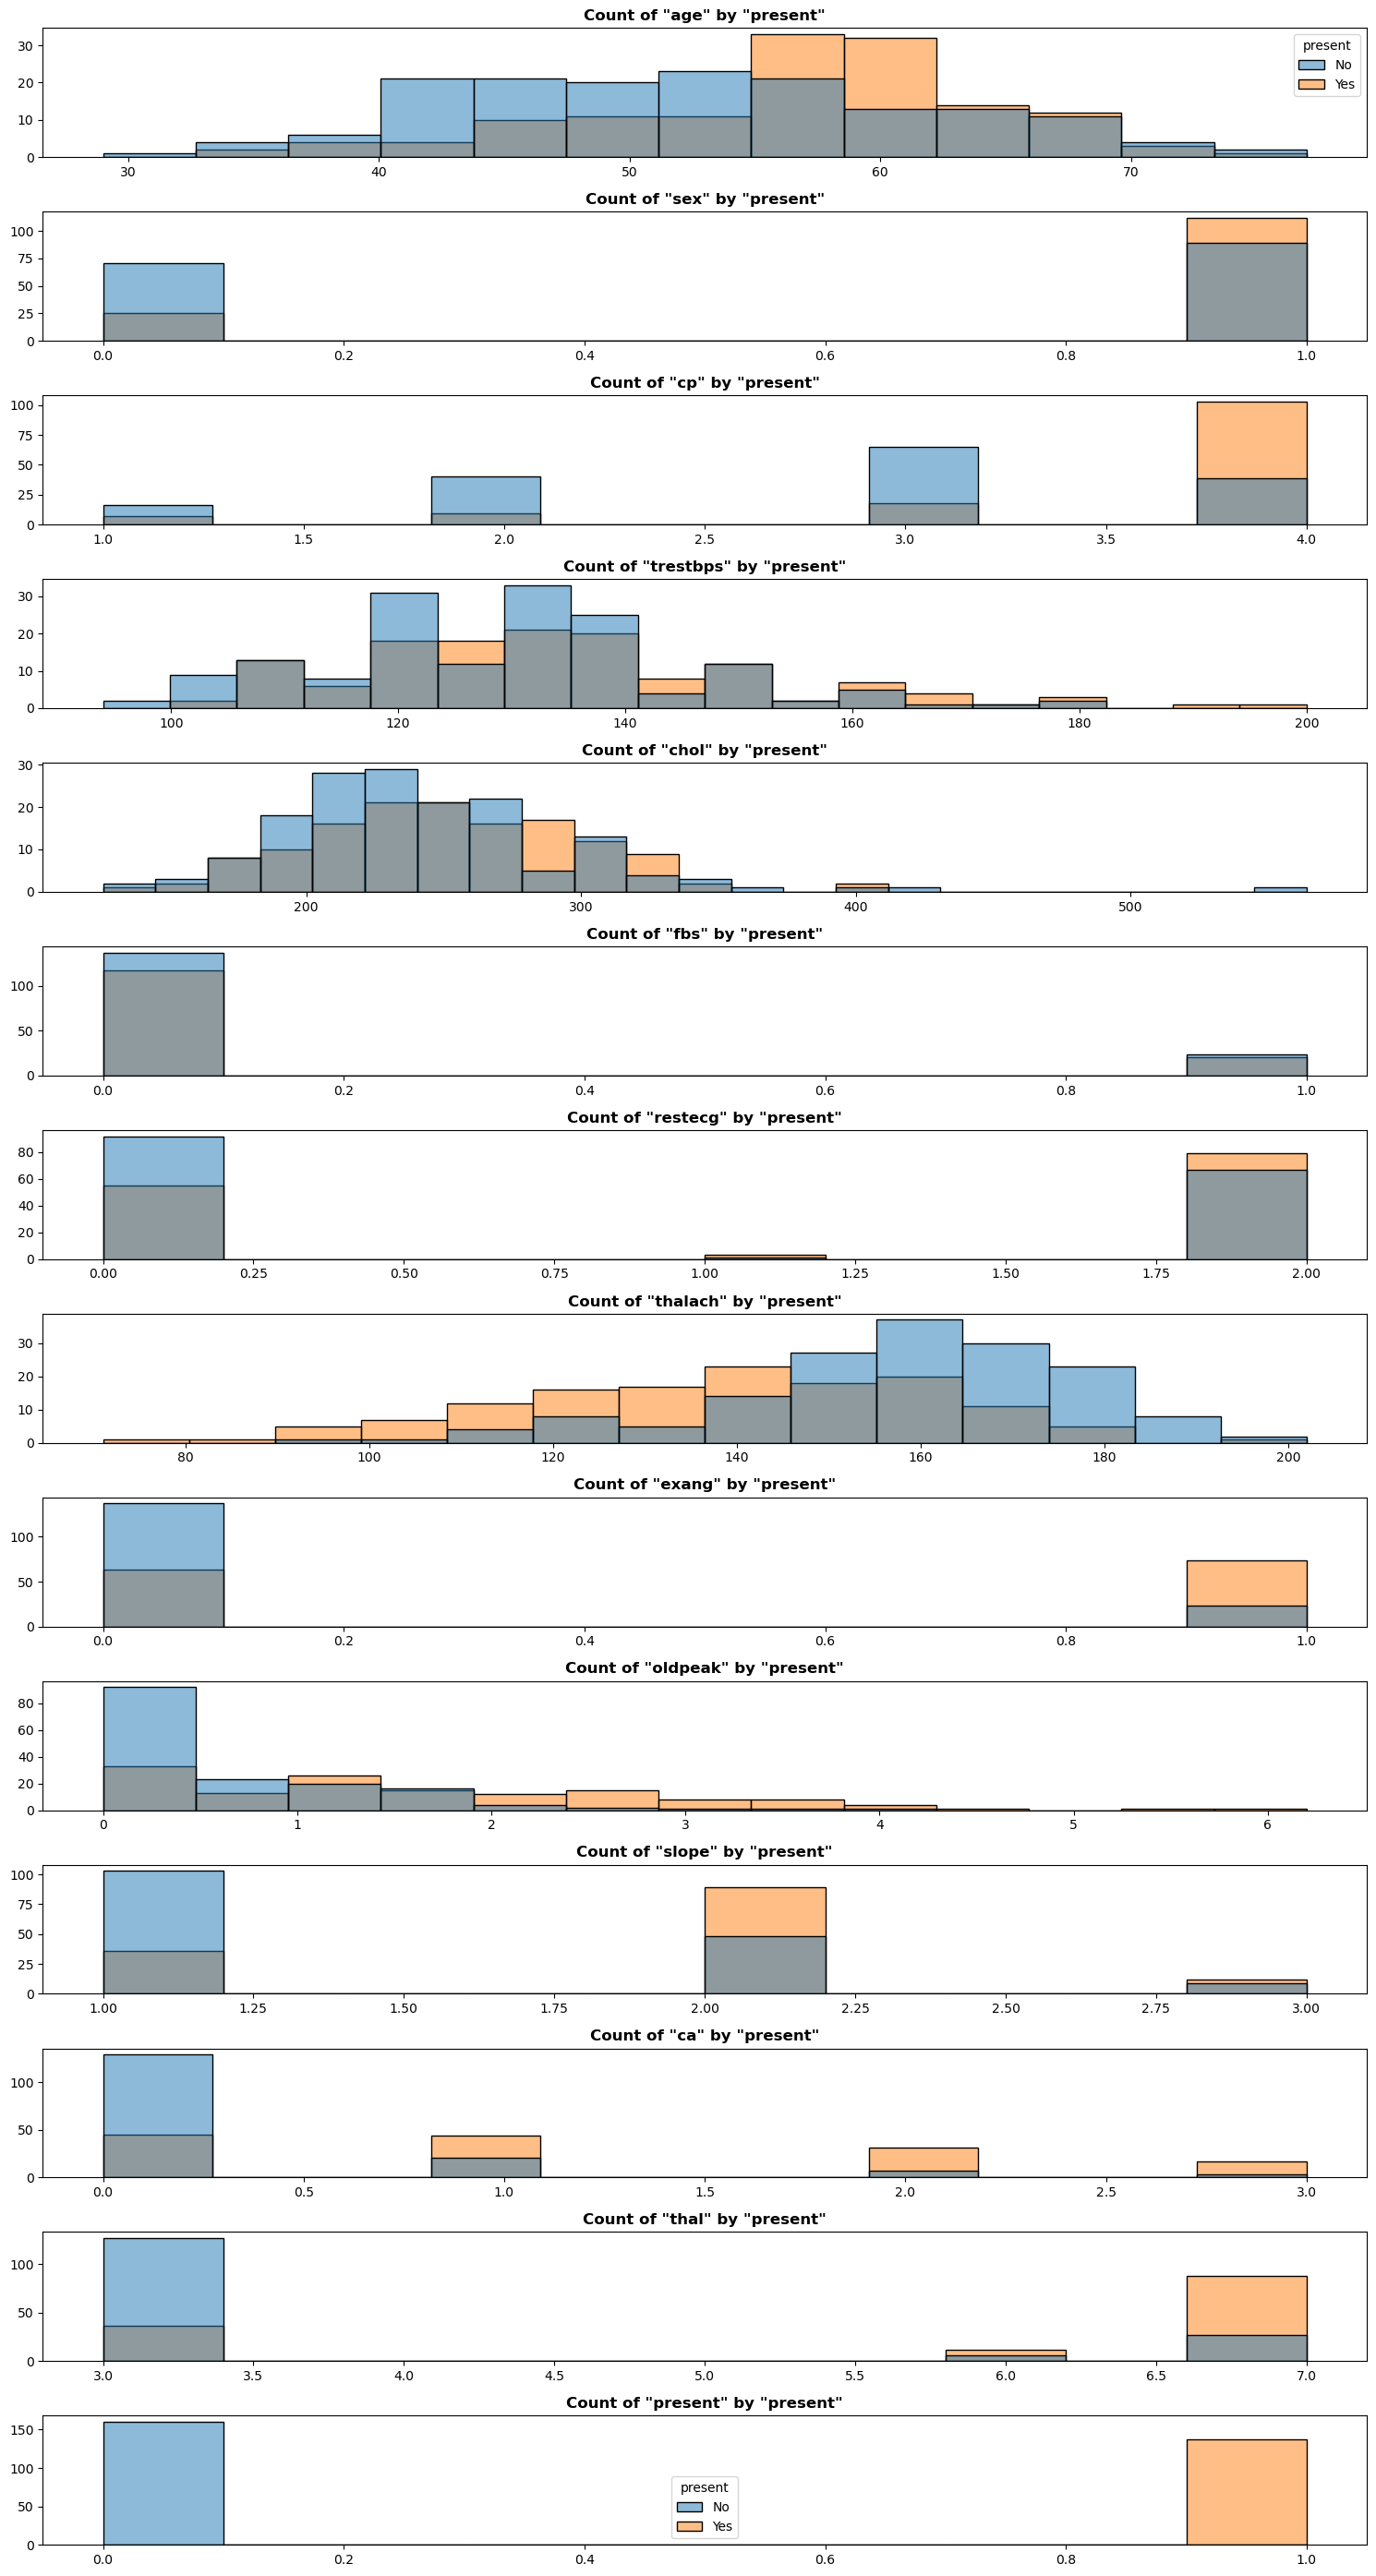

In [12]:
# Save length of columns for visualization
num_columns = len(heart.columns)

# Create subplots dynamically based on the number of columns
fig, axs = plt.subplots(num_columns, figsize=(15, num_columns * 2))

# Iterate over each column and plot them
for i, column in enumerate(heart.columns):
    sns.histplot(data=heart, x=column, hue=heart['present'].map({1: 'Yes', 0: 'No'}), multiple='layer', ax=axs[i])
    axs[i].set_title(f'Count of "{column}" by "present"', weight='bold')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    
# Remove legends from plots
for i, ax in enumerate(axs.flat):
    if i > 0 and i < 13:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

# Use tight layout for visualization
plt.tight_layout()
plt.show()

#### Description of Count Plots
The count plots above illustrate the distribution of various features with respect to the presence of heart disease. The hue parameter is used to differentiate between the two categories of the target variable, present (where 0 indicates no heart disease and 1 indicates heart disease). The multiple='layer' setting in the countplot command causes each bar to be split into layers corresponding to the hue categories, which are stacked on top of each other. This allows us to see both the total counts and the distribution within each main category.

**Details of Observations:**

`age`: The plot shows that as age increases, the likelihood of having heart disease (indicated by present=1) also increases, particularly up to around age 70. Beyond this age, the trend appears to reverse slightly, with older individuals more frequently not having heart disease. This trend aligns with the expectation that heart disease risk increases with age, although very elderly individuals may show a reduced incidence possibly due to other health factors.

`sex`: For women, the count of those without heart disease (present=0) is noticeably higher compared to those with heart disease (present=1). In contrast, the plot for men shows a higher count of those with heart disease compared to those without. This suggests a higher incidence of heart disease among men in this dataset.

`cp` (chest pain type): Patients with a cp value of 4.0 (which corresponds to typical angina) show a higher proportion of heart disease compared to those with other cp values. This indicates that typical angina is strongly associated with heart disease.

`restecg` (resting electrocardiographic results): The plot reveals that patients showing probable or definite left ventricular hypertrophy have a higher count of heart disease. This result suggests that these electrocardiographic findings are associated with a greater risk of heart disease.

`thalach` (maximum heart rate achieved): The plot indicates that lower maximum heart rates are associated with higher counts of heart disease. This correlation suggests that lower exercise capacity or heart rate response could be a marker for heart disease.

`exang` (exercise induced angina): A value of 1 (indicating exercise-induced angina) is strongly associated with a higher count of heart disease, demonstrating that exercise-induced angina is a significant predictor of heart disease.

`oldpeak` (depression induced by exercise relative to rest): Higher oldpeak values, which indicate greater ST depression during exercise compared to rest, are associated with more heart disease cases. This is consistent with the idea that ST segment depression is a marker of cardiac ischemia and heart disease.


#### Dummies

After look at the feature variables, there are several features worth to be transformed to dummies. This transformation includes the following variables:

`cp` (Chest Pain Type): This is a categorical variable with four categories, and converting it into dummy variables will let the model treat each type of chest pain as a separate binary feature.

`restecg` (Resting Electrocardiographic Results): This has three categories, and dummy variables will allow the model to differentiate between the different types of ECG results.

`slope` (Slope of the Peak Exercise ST Segment): This variable describes the slope in three categories. Dummy encoding will help the model recognize the distinct impact of each slope type.

`ca` (Number of Major Vessels Colored by Flourosopy): This is an ordinal categorical variable, but since it has more than two categories, converting it into dummy variables will make it easier for the model to learn the impact of having different numbers of vessels.

`thal` (Thalassemia): This variable has three categories indicating the status of the thalassemia, which is important in diagnosing heart disease. Dummy encoding will help in capturing the difference between normal, fixed defect, and reversible defect.

In [13]:
# Create dummies for discrete columns
heart_dummies = pd.get_dummies(heart, columns=['cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)
heart_dummies

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,present,cp_2,...,cp_4,restecg_1,restecg_2,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0,False,...,False,False,True,False,True,False,False,False,True,False
1,67,1,160,286,0,108,1,1.5,1,False,...,True,False,True,True,False,False,False,True,False,False
2,67,1,120,229,0,129,1,2.6,1,False,...,True,False,True,True,False,False,True,False,False,True
3,37,1,130,250,0,187,0,3.5,0,False,...,False,False,False,False,True,False,False,False,False,False
4,41,0,130,204,0,172,0,1.4,0,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,123,1,0.2,1,False,...,True,False,False,True,False,False,False,False,False,True
298,45,1,110,264,0,132,0,1.2,1,False,...,False,False,False,True,False,False,False,False,False,True
299,68,1,144,193,1,141,0,3.4,1,False,...,True,False,False,True,False,False,True,False,False,True
300,57,1,130,131,0,115,1,1.2,1,False,...,True,False,False,True,False,True,False,False,False,True


#### Correlations

In [14]:
# Correlation
heart_dummies.corr()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,present,cp_2,...,cp_4,restecg_1,restecg_2,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
age,1.000000,-0.092399,0.290476,0.202644,0.132062,-0.394563,0.096489,0.197123,0.227075,-0.163227,...,0.137297,0.083519,0.139295,0.171004,0.025612,0.171946,0.222475,0.159356,0.059732,0.103792
sex,-0.092399,1.000000,-0.066340,-0.198089,0.038850,-0.060496,0.143581,0.106567,0.278467,-0.041925,...,0.085014,-0.106613,0.045963,-0.010357,0.050211,0.104641,-0.015456,0.070798,0.145368,0.327671
trestbps,0.290476,-0.066340,1.000000,0.131536,0.180860,-0.049108,0.066691,0.191243,0.153490,-0.080820,...,0.029082,0.058025,0.141565,0.025511,0.121060,-0.061574,0.086767,0.078892,0.075211,0.109624
chol,0.202644,-0.198089,0.131536,1.000000,0.012708,-0.000075,0.059339,0.038596,0.080285,-0.017678,...,0.064831,0.032412,0.160217,0.041510,-0.051456,0.007881,0.052369,0.093691,-0.099575,0.047368
fbs,0.132062,0.038850,0.180860,0.012708,1.000000,-0.007842,-0.000893,0.008311,0.003167,-0.053990,...,-0.087329,-0.048074,0.073918,-0.054418,0.110477,-0.009506,0.128859,0.080348,0.096002,0.026522
thalach,-0.394563,-0.060496,-0.049108,-0.000075,-0.007842,1.000000,-0.384368,-0.347640,-0.423817,0.256120,...,-0.377920,-0.121669,-0.057784,-0.423817,-0.056541,-0.196607,-0.056676,-0.176564,-0.160679,-0.213956
exang,0.096489,0.143581,0.066691,0.059339,-0.000893,-0.384368,1.000000,0.289310,0.421355,-0.232185,...,0.454514,0.043202,0.076351,0.248527,0.059978,0.152302,0.098640,0.013408,0.063827,0.301283
oldpeak,0.197123,0.106567,0.191243,0.038596,0.008311,-0.347640,0.289310,1.000000,0.424052,-0.283033,...,0.271036,0.167555,0.093657,0.312656,0.393024,-0.018964,0.214636,0.186832,0.101819,0.305253
present,0.227075,0.278467,0.153490,0.080285,0.003167,-0.423817,0.421355,0.424052,1.000000,-0.247535,...,0.507035,0.067672,0.157440,0.349635,0.060950,0.228974,0.272400,0.209531,0.104651,0.484657
cp_2,-0.163227,-0.041925,-0.080820,-0.017678,-0.053990,0.256120,-0.232185,-0.283033,-0.247535,1.000000,...,-0.425452,-0.051936,-0.092316,-0.211140,-0.051832,-0.059762,-0.088788,-0.083242,-0.036866,-0.204351


The predictors with the highest absolute correlation with "present" are:

- `thal_7.0`: 0.484657
- `oldpeak`: 0.424052
- `exang`: 0.421355
- `ca_3.0`: 0.209531
- `ca_2.0`: 0.272400
- `cp_4`: 0.507035
- `cp_3`: -0.305345
- `thalach`: -0.423817
- `slope_2`: 0.349635

#### Heatmap Correlation

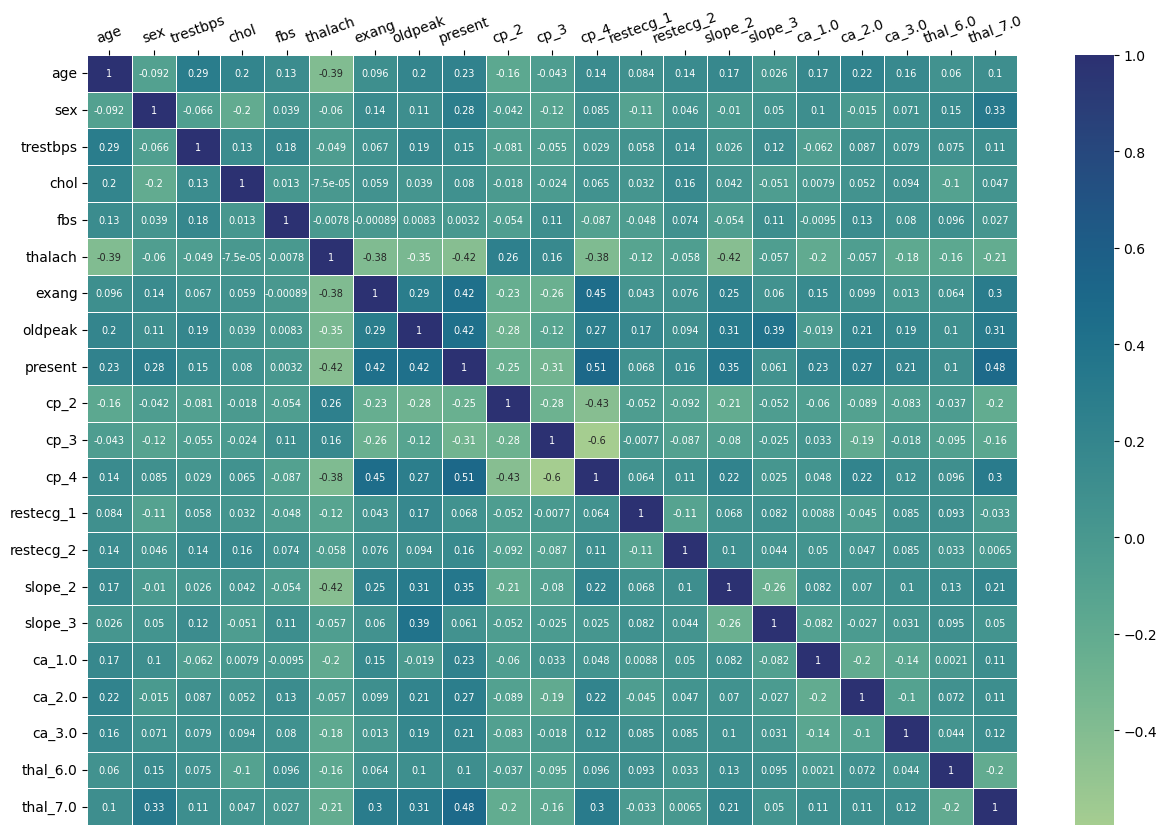

In [15]:
# Plot correlations in heatmap
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(heart_dummies.corr(), cmap='crest', annot=True, annot_kws={"fontsize":7}, linewidths=.5, ax=ax)

# Set xlabel to top, rotate labels
ax.xaxis.tick_top()
plt.xticks(rotation=20) 

plt.show()

#### VIF

(VIF) is a common and effective method for detecting multicollinearity among predictors in our model. Multicollinearity occurs when two or more predictors in a regression model are highly correlated, which can lead to unreliable estimates of the coefficients and inflated standard errors.

VIF < 5: Generally indicates low to moderate multicollinearity.
VIF between 5 and 10: Suggests moderate multicollinearity; consider further investigation.
VIF > 10: High multicollinearity; you might need to address this by removing or combining predictors.

In [16]:
# Include statsmodels variance_inflation_factor to calculate the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Save predictors into dataframe
data = heart.drop(columns=['present'])

# Add constant for every regression
vif_with_const = add_constant(data)

# Calculate the VIF for every variable
vif_data = pd.DataFrame()
vif_data["Variable"] = vif_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(vif_with_const.values, i) for i in range(vif_with_const.shape[1])]

# Show output
print(vif_data)

    Variable         VIF
0      const  251.649736
1        age    1.492890
2        sex    1.304240
3         cp    1.322040
4   trestbps    1.209070
5       chol    1.137099
6        fbs    1.078260
7    restecg    1.091455
8    thalach    1.645696
9      exang    1.377849
10   oldpeak    1.759751
11     slope    1.681559
12        ca    1.350350
13      thal    1.520653


As a result of our VIF analysis we see, that all of the potential predictors do have a VIF value below 2, which is way outside the critical value. Given that all VIF values are around 1.2 - 1.3, there's no immediate need to take action regarding multicollinearity for these predictors.

#### Which Predictors?

Based on the absolute values of the correlation coefficients and the VIF analysis, here are the predictors to prioritize for inclusion in the model:

- `thal`: Specifically, the category thal_7.0 has a correlation of 0.480582 with the target variable, indicating a moderate positive relationship with the presence of heart disease.
- `exang`: This variable has a correlation of 0.431894, suggesting a moderate positive relationship with heart disease.
- `oldpeak`: The correlation here is 0.424510, which also indicates a moderate positive relationship with heart disease.
- `cp`: The category cp_4 has a correlation of 0.516459, reflecting a strong positive relationship with heart disease.
- `thalach`: This variable has a correlation of -0.417167, showing a moderate negative relationship with heart disease (i.e., lower maximum heart rates are associated with a higher likelihood of heart disease).
- `slope`: The category slope_2 has a correlation of 0.349635. Showing a low to moderate positive relationship with heart disease (i.e., a flat slope of the peak exercise ST segment is associated with a higher likelihoof of heart disease).

In addition, `sex` is included as a predictor despite its lower correlation (0.276816) with the target variable. This is because it is an important feature for understanding differences in heart disease prevalence between genders, and its inclusion can provide valuable insights.

In [17]:
# Import train test split model
from sklearn.model_selection import train_test_split

# Save y and X for model creation
y = heart['present']
X = heart[['thal', 'exang', 'oldpeak', 'cp', 'thalach', 'sex', 'slope']]

# Create dummies for X
X_dummies = pd.get_dummies(X, columns=['cp', 'thal', 'slope'], drop_first=True)

# Split data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=.2, random_state=42)

In [18]:
# Check that both the training and test datasets have cases and non-cases. 
y_train.value_counts()

present
0    124
1    113
Name: count, dtype: int64

In [19]:
# Check that both the training and test datasets have cases and non-cases. 
y_test.value_counts()

present
0    36
1    24
Name: count, dtype: int64

In [20]:
# Import packages for further analysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Initiate scaler 
scaler = StandardScaler()

# Scale train and trest data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initiate logistic model
model = LogisticRegression()

# Fit model with train data
model.fit(X_train_scaled, y_train)

# Calculate prediction for train
y_train_pred = model.predict(X_train_scaled)

# Calculate train accuracy
train_accuracy = model.score(X_train_scaled, y_train)

# Calculate Sensitivity and Specificity
tp = sum((y_train_pred == 1) & (y_train == 1))
fn = sum((y_train_pred == 0) & (y_train == 1))
tn = sum((y_train_pred == 0) & (y_train == 0))
fp = sum((y_train_pred == 1) & (y_train == 0))

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

In [21]:
# Print Values for Accuracy, Sensitivity and Specificity
print(f'Train Accuracy {round(train_accuracy*100, 2)}')
print(f'Sensitivity {round(sensitivity*100, 2)}')
print(f'Specificity {round(specificity*100, 2)}')

Train Accuracy 82.7
Sensitivity 81.42
Specificity 83.87


#### Interim Evaluation

Let examine what we did before and what the results indicate:

1. Separating Features and Target Variable
We start by defining our target variable (y), which represents the presence or absence of heart disease, and our feature matrix (X), which contains the variables we believe might predict heart disease. In this case, the selected features are thal, exang, oldpeak, cp, thalach, and sex.

2. Creating Dummy Variables
Categorical variables like cp (chest pain type) and thal (thalassemia) are converted into dummy variables using pd.get_dummies(). This step is necessary because logistic regression requires numerical input, and dummy variables transform categorical data into a binary format. The parameter drop_first=True is used to prevent multicollinearity by dropping the first category in each dummy variable group.

3. Splitting Data into Training and Testing Sets
The dataset is then divided into training and testing sets using train_test_split. We use 80% of the data for training the model and 20% for testing its performance. Setting a random_state ensures that the split is reproducible.

4. Checking Class Balance
Before training the model, we check the balance of the target variable in both the training and testing sets. This ensures that each set has a fair representation of cases (1, indicating heart disease) and non-cases (0, indicating no heart disease), which is essential for building a reliable model.

5. Scaling the Features
We apply StandardScaler to standardize the features. Standardization involves scaling the data such that it has a mean of 0 and a standard deviation of 1. This step is critical because it ensures that all features contribute equally to the model and that the model’s performance is not skewed by features with larger numerical ranges.

6. Training the Logistic Regression Model
Next, we train a logistic regression model using the scaled training data. The model learns the relationship between the features and the target variable, enabling it to make predictions about heart disease.

7. Making Predictions and Evaluating Accuracy
The model is then used to predict the target variable on the training data. We calculate the training accuracy, which measures the percentage of correct predictions the model makes on the training set.

8. Calculating Sensitivity and Specificity
To evaluate the model’s performance more thoroughly, we calculate:

    - Sensitivity (Recall): This measures the proportion of actual heart disease cases that the model correctly identifies. A sensitivity of 81.42% indicates that the model correctly identifies about 81% of those who have heart disease.

    - Specificity: This measures the proportion of actual non-heart disease cases that the model correctly identifies. With a specificity of 83.87%, the model correctly identifies 84% of those who do not have heart disease.
  
**Summary of Model Performance**
- Train Accuracy: The model correctly classifies 82.7% of the cases in the training data.
- Sensitivity: The model successfully identifies 81.42% of actual heart disease cases, meaning it is reasonably good at catching true positives.
- Specificity: The model correctly identifies 83.87% of non-heart disease cases, indicating a strong ability to avoid false positives.

#### Examine Coefficients

In [22]:
# Calculate train coefficients
coefficients = model.coef_
coefficients

array([[ 0.3134132 ,  0.67593953, -0.44823853,  0.53380564,  0.23733187,
        -0.17927136,  0.67254272, -0.0937608 ,  0.66597284,  0.29698053,
        -0.05937294]])

In [23]:
# Transform log-odds to odds ration
odds = np.exp(coefficients)
odds

array([[1.36808671, 1.96587911, 0.6387523 , 1.70541015, 1.26786181,
        0.83587904, 1.95921273, 0.91050053, 1.94638311, 1.3457891 ,
        0.94235526]])

Lets conclude what we found in the above code execution. We'll skip the coefficient values, better known as log-odds, since this values are hardly interpretable. The exponential of the coefficients, known as odds ratio is more useable.

**Odds Ratio Interpretation**
- Odds Ratio > 1: A value greater than 1 indicates that as the predictor increases, the odds of having heart disease (target = 1) increase. For example, if the odds ratio is 2, this suggests that a one-unit increase in the predictor variable doubles the odds of having heart disease.

- Odds Ratio < 1: A value less than 1 indicates that as the predictor increases, the odds of having heart disease decrease. For example, if the odds ratio is 0.7, this suggests that a one-unit increase in the predictor reduces the odds of having heart disease by 30%.

Lets look at the predictors an there associated odds ratios:

| Predictor | Odds ratio | Interpretation |
| --- |  --- | --- |
| exang (exercise-induced angina) | 1.37 | Patients with exercise-induced angina have 1.37 times higher odds of having heart disease compared to those without it. |
| oldpeak (ST depression induced by exercise relative to rest) | 1.97 | For every unit increase in oldpeak, the odds of having heart disease increase by about 1.97 times. This suggests that higher oldpeak values are associated with a significantly increased likelihood of heart disease.|
| thalach (maximum heart rate achieved) | 0.64 | For every unit increase in thalach, the odds of having heart disease decrease by about 36%. A higher maximum heart rate achieved is associated with lower odds of having heart disease. |
| sex (1 = male, 0 = female) | 1.71 | Males have 1.71 times higher odds of having heart disease compared to females. |
| cp_2 (chest pain type 2: atypical angina) | 1.27 | Patients with atypical angina (cp_2) have 1.27 times higher odds of having heart disease compared to the baseline chest pain type (typical angina). |
| cp_3 (chest pain type 3: non-anginal pain) | 0.84 | Patients with non-anginal pain (cp_3) have slightly lower odds of having heart disease compared to the baseline chest pain type. This suggests a minor protective effect, though it is not very strong. |
| cp_4 (chest pain type 4: asymptomatic) | 1.96 | Patients with asymptomatic chest pain (cp_4) have about 1.96 times higher odds of having heart disease compared to the baseline chest pain type (typical angina). |
| thal_6.0 (thalassemia fixed defect) | 0.91 | This thalassemia type slightly reduces the odds of having heart disease, by about 9% (compared to the baseline "normal"), which is a small protective effect. |
| thal_7.0 (thalassemia reversable defect) | 1.95 | This thalassemia type increases the odds of having heart disease by about 1.95 times (compared to the baseline "normal"), suggesting a significant risk factor. |
| slope_2 (Slope of the peak exercise ST segment - type 2) | 1.35 | A slope type 2 is associated with 1.35 times higher odds of having heart disease compared to the baseline slope type. |
| slope_3 (Slope of the peak exercise ST segment - type 3) | 0.94 | A slope type 3 has a slightly protective effect, reducing the odds of heart disease by about 6%. |

#### Training Summary
- **Risk Factors**: Variables like oldpeak, sex, cp_4, thal_7.0, and exang are associated with an increased likelihood of heart disease, as their odds ratios are greater than 1.

- **Protective Factors**: Variables like thalach, cp_3, thal_6.0, and slope_3 have odds ratios less than 1, indicating a decreased likelihood of heart disease.

#### Test Data

In [24]:
# Calculate test predictions
y_test_pred = model.predict(X_test_scaled)

# Calculate test accuracy
test_accuracy = model.score(X_test_scaled, y_test)

# Calculate Sensitivity and Specificity for test data
test_tp = sum((y_test_pred == 1) & (y_test == 1))
test_fn = sum((y_test_pred == 0) & (y_test == 1))
test_tn = sum((y_test_pred == 0) & (y_test == 0))
test_fp = sum((y_test_pred == 1) & (y_test == 0))

test_sensitivity = test_tp / (test_tp + test_fn)
test_specificity = test_tn / (test_tn + test_fp)

In [25]:
# Print Values for Accuracy, Sensitivity and Specificity
print(f'Test Accuracy {round(test_accuracy*100, 2)}')
print(f'Test Sensitivity {round(test_sensitivity*100, 2)}')
print(f'Test Specificity {round(test_specificity*100, 2)}')

Test Accuracy 86.67
Test Sensitivity 75.0
Test Specificity 94.44


#### Conclusion

The logistic regression model developed to predict heart disease shows promising results, with a test accuracy of 86.67%, marking an approximate 4% increase from the training accuracy. This improvement indicates that the model generalizes well to unseen data, which is a positive sign of its robustness and reliability.

**Key Metrics:**
- Test Sensitivity: 75.0%
- Test Specificity: 94.44%

The model demonstrates a strong ability to correctly identify individuals without heart disease (specificity of 94.44%), which suggests a low rate of false positives. However, while the sensitivity is relatively high at 75.0%, there is some room for improvement in identifying all true cases of heart disease, as a quarter of the actual cases might be missed.

**Implications:**

The increase in accuracy on the test set, coupled with a high specificity and decent sensitivity, suggests that the model is effective and well-calibrated for this dataset. However, in contexts where the cost of missing a heart disease diagnosis is high, further refinement might be needed to improve sensitivity. Since the sensitivity is 0.75 and specificity is 0.95, the model is better at predicting non-cases (negative class) than cases (positive class). Overall, the model's performance is strong, and the increase in accuracy upon testing reinforces its potential for practical application in predicting heart disease.